### Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('laptop_price_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,Cpu brand,HDD,SSD,Gpu brand,os
0,0,Apple,Ultrabook,8,1.37,71378.6832,0,1,Intel Core i5,0,128,Intel,Mac
1,1,Apple,Ultrabook,8,1.34,47895.5232,0,0,Intel Core i5,0,0,Intel,Mac
2,2,HP,Notebook,8,1.86,30636.0000,0,0,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,3,Apple,Ultrabook,16,1.83,135195.3360,0,1,Intel Core i7,0,512,AMD,Mac
4,4,Apple,Ultrabook,8,1.37,96095.8080,0,1,Intel Core i5,0,256,Intel,Mac


In [4]:
df.shape

(1302, 13)

In [5]:
df.isnull().sum()

Unnamed: 0     0
Company        0
TypeName       0
Ram            0
Weight         0
Price          0
Touchscreen    0
Ips            0
Cpu brand      0
HDD            0
SSD            0
Gpu brand      0
os             0
dtype: int64

In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,Intel Core i5,0,256,Intel,Mac


In [8]:
df.duplicated().sum()

30

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.dtypes

Company         object
TypeName        object
Ram              int64
Weight         float64
Price          float64
Touchscreen      int64
Ips              int64
Cpu brand       object
HDD              int64
SSD              int64
Gpu brand       object
os              object
dtype: object

In [25]:
cat_cols = df.dtypes[df.dtypes == 'object'].index
num_cols = df.dtypes[df.dtypes != 'object'].index
print(cat_cols)
print(num_cols)

Index(['Company', 'TypeName', 'Cpu brand', 'Gpu brand', 'os'], dtype='object')
Index(['Ram', 'Weight', 'Price', 'Touchscreen', 'Ips', 'HDD', 'SSD'], dtype='object')


### EDA - Exploratory Data Analysis

In [24]:
print(df.columns)

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'Touchscreen', 'Ips',
       'Cpu brand', 'HDD', 'SSD', 'Gpu brand', 'os'],
      dtype='object')


In [13]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,Intel Core i5,0,256,Intel,Mac


In [26]:
df['Company'].value_counts()

Dell         291
Lenovo       289
HP           268
Asus         151
Acer         101
MSI           54
Toshiba       47
Apple         21
Samsung        8
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

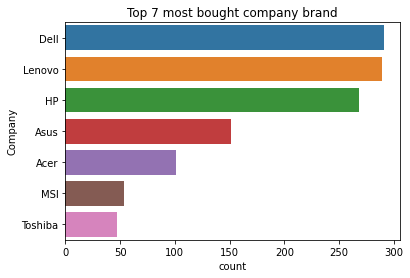

In [28]:
sns.countplot(y=df['Company'],order=df['Company'].value_counts()[:7].sort_values(ascending=False).index)
plt.title('Top 7 most bought company brand')
plt.show()

#### Inference
Dell and Lenovo are most bought Laptops

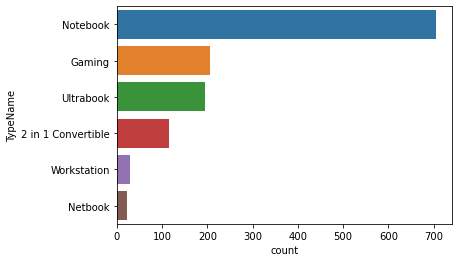

In [15]:
sns.countplot(y=df['TypeName'],order=df['TypeName'].value_counts().sort_values(ascending=False).index)
plt.show()

### Boxplot of price with different CPU Brand

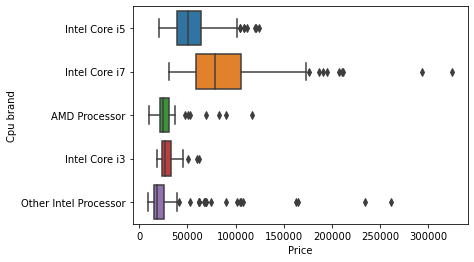

In [29]:
sns.boxplot(y=df['Cpu brand'] ,x=df['Price'])
plt.show()

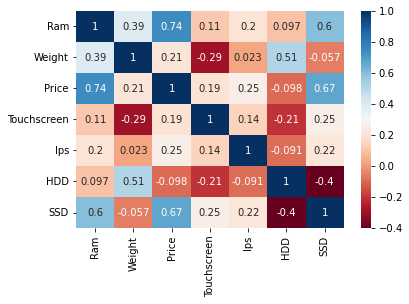

In [16]:
# Correlation
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

### Inference
RAM and Price and positively affecting the Price . They have high correlation with Price

### Outlier Treatment

In [34]:
print(num_cols)

Index(['Ram', 'Weight', 'Price', 'Touchscreen', 'Ips', 'HDD', 'SSD'], dtype='object')


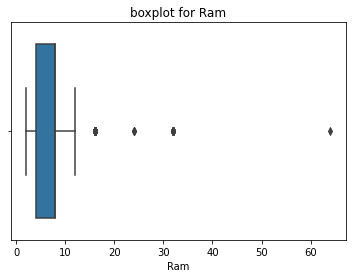

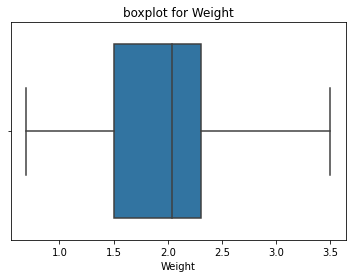

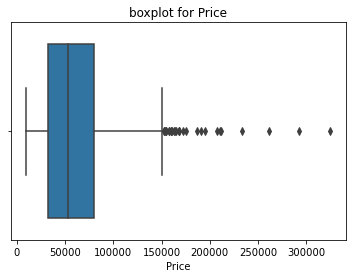

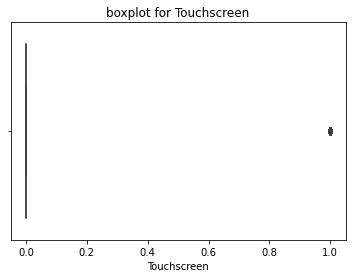

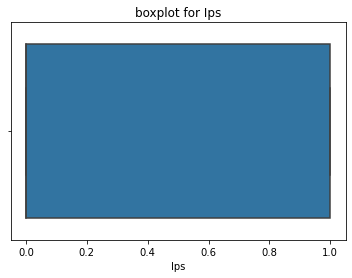

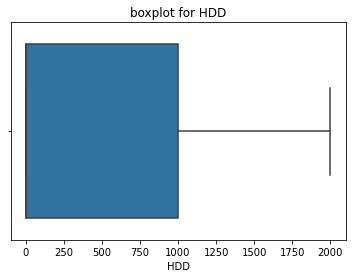

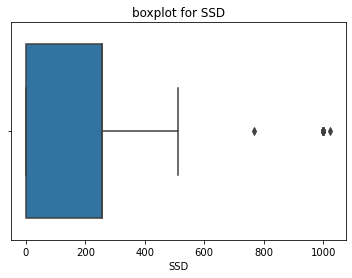

In [35]:
for i in num_cols:
    sns.boxplot(x=df[i])
    plt.title(f'boxplot for {i}')
    plt.show()

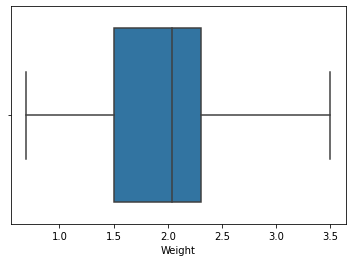

In [18]:
df['Weight'] = np.where(df['Weight']>3.5,3.5,df['Weight'])
sns.boxplot(x=df['Weight'])
plt.show()

### Boxplot of price with different Gpu Brand

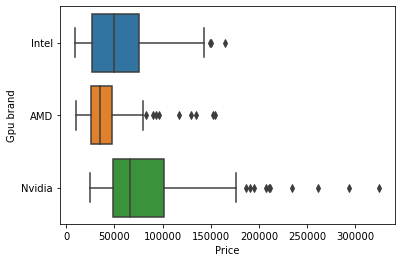

In [30]:
sns.boxplot(y= df['Gpu brand'],x=df['Price'])
plt.show()

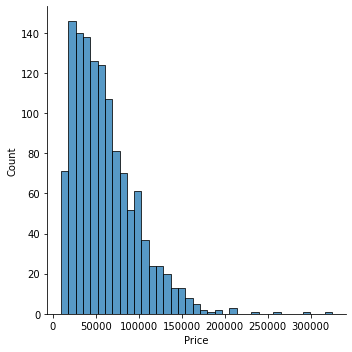

In [32]:
sns.displot(x=df['Price'])
plt.show()

In [20]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'Touchscreen', 'Ips',
       'Cpu brand', 'HDD', 'SSD', 'Gpu brand', 'os'],
      dtype='object')

In [21]:
# Selecting the dependent and independent features
x= df.drop('Price',axis=1)
y = df['Price']
print(x.shape)
print(y.shape)

(1272, 11)
(1272,)


In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1017, 11)
(255, 11)
(1017,)
(255,)


In [39]:
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error,r2_score

### Creating function to evaluate the performance of the model

In [38]:
def eval_model(ytest,ypred):
    mse = mean_squared_error(ytest,ypred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(ytest,ypred)
    print('MSE',mse)
    print('RMSE',rmse)
    print('MAE',mae)
    print('R2_Score',r2_score(ytest,ypred))

### Import ML Models

In [46]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

### Import sklearn libraries - OneHotEncoder,ColumnTransformer and Pipeline

In [47]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [48]:
print(df.columns)
print(cat_cols)
print(x_train.columns)

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'Touchscreen', 'Ips',
       'Cpu brand', 'HDD', 'SSD', 'Gpu brand', 'os'],
      dtype='object')
Index(['Company', 'TypeName', 'Cpu brand', 'Gpu brand', 'os'], dtype='object')
Index(['Company', 'TypeName', 'Ram', 'Weight', 'Touchscreen', 'Ips',
       'Cpu brand', 'HDD', 'SSD', 'Gpu brand', 'os'],
      dtype='object')


### 1) Linear Regression

In [51]:
step1 = ColumnTransformer(transformers = 
                         [('encoders',OneHotEncoder(drop='first',sparse=False),[0,1,6,9,10])],
                         remainder='passthrough')
step2 = LinearRegression()

pipe_lr = Pipeline([('Step1',step1),('Step2',step2)])
pipe_lr.fit(x_train,y_train)
ypred_lr = pipe_lr.predict(x_test)
print(eval_model(y_test,ypred_lr))

MSE 435821796.09900117
RMSE 20876.345372191015
MAE 14051.655348438015
R2_Score 0.6944878161689537
None


C:\Users\ANUP\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#### 2) Ridge Regression

In [59]:
step1 = ColumnTransformer(transformers = 
                         [('encoders',OneHotEncoder(drop='first',sparse=False),[0,1,6,9,10])],
                         remainder='passthrough')
step2 = Ridge(alpha = 4)

pipe_rd = Pipeline([('Step1',step1),('Step2',step2)])
pipe_rd.fit(x_train,y_train)
ypred_rd = pipe_rd.predict(x_test)
print(eval_model(y_test,ypred_rd))

MSE 403282572.32921034
RMSE 20081.896631772866
MAE 13595.673384254904
R2_Score 0.7172978945153283
None


C:\Users\ANUP\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### 2) Lasso Regression

In [60]:
step1 = ColumnTransformer(transformers = 
                         [('encoders',OneHotEncoder(drop='first',sparse=False),[0,1,6,9,10])],
                         remainder='passthrough')
step2 = Lasso(alpha=7)

pipe_lsso = Pipeline([('Step1',step1),('Step2',step2)])
pipe_lsso.fit(x_train,y_train)
ypred_lsso = pipe_lsso.predict(x_test)
print(eval_model(y_test,ypred_lsso))

MSE 428064512.3026835
RMSE 20689.719966753622
MAE 13901.076302852944
R2_Score 0.6999256917741286
None


C:\Users\ANUP\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#### 4) KNN Regression

In [61]:
step1 = ColumnTransformer(transformers = 
                         [('encoders',OneHotEncoder(drop='first',sparse=False),[0,1,6,9,10])],
                         remainder='passthrough')
step2 = KNeighborsRegressor(n_neighbors = 7)

pipe_knn = Pipeline([('Step1',step1),('Step2',step2)])
pipe_knn.fit(x_train,y_train)
ypred_knn = pipe_knn.predict(x_test)
print(eval_model(y_test,ypred_knn))

MSE 483301147.0366976
RMSE 21984.111240545924
MAE 13534.904954621848
R2_Score 0.6612046708061156
None


C:\Users\ANUP\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### 5) DT Regression

In [62]:
step1 = ColumnTransformer(transformers = 
                         [('encoders',OneHotEncoder(drop='first',sparse=False),[0,1,6,9,10])],
                         remainder='passthrough')
step2 = DecisionTreeRegressor(criterion='squared_error',max_depth = 10,min_samples_split = 15)

pipe_dt = Pipeline([('Step1',step1),('Step2',step2)])
pipe_dt.fit(x_train,y_train)
ypred_dt = pipe_dt.predict(x_test)
print(eval_model(y_test,ypred_dt))

MSE 333188798.6508736
RMSE 18253.45990903844
MAE 12049.102305889213
R2_Score 0.7664338075447061
None


C:\Users\ANUP\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### 6) RF Regression

In [63]:
step1 = ColumnTransformer(transformers = 
                         [('encoders',OneHotEncoder(drop='first',sparse=False),[0,1,6,9,10])],
                         remainder='passthrough')
step2 = RandomForestRegressor(criterion='squared_error',n_estimators=100,
                              max_depth=10,min_samples_split=15,random_state=5)

pipe_rf = Pipeline([('Step1',step1),('Step2',step2)])
pipe_rf.fit(x_train,y_train)
ypred_rf = pipe_rf.predict(x_test)
print(eval_model(y_test,ypred_rf))

C:\Users\ANUP\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


MSE 326239795.3163089
RMSE 18062.109381694845
MAE 11386.938157472448
R2_Score 0.7713050764972801
None


### Inference 
Random Forest Regression is the best model in terms of R2 Score and RMSE

### Save the Model

In [58]:
import pickle

In [64]:
pickle.dump(pipe_rf,open('rf.pkl','wb'))

In [65]:
pickle.dump(df,open('df.pkl','wb'))

In [66]:
print(df.columns)

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'Touchscreen', 'Ips',
       'Cpu brand', 'HDD', 'SSD', 'Gpu brand', 'os'],
      dtype='object')


In [67]:
df['Ram'].unique()

array([ 8, 16,  4,  2, 12,  6, 32, 24, 64], dtype=int64)

In [68]:
df['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [69]:
df['HDD'].unique()

array([   0,  500, 1000, 2000,   32,  128], dtype=int64)

In [70]:
df['SSD'].unique()

array([ 128,    0,  256,  512,   32,   64, 1000, 1024,   16,  768,  180,
        240,    8], dtype=int64)

In [71]:
df['Touchscreen'].unique()

array([0, 1], dtype=int64)